<a href="https://colab.research.google.com/github/DrSnek/Doctor/blob/main/CAD_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import itertools
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

!pip install tflearn

from keras.models import Sequential, Model
from keras.layers import Conv2D, Dropout, MaxPooling2D, Input
from keras.layers import BatchNormalization, Activation, Flatten, Dense
from tensorflow.keras import initializers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Clean, Explore and Process Dataset

In [ ]:
url = "https://drive.google.com/file/d/1T_kvUBOuoVLku_N6Am1dxb1M2qZUBFf4/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


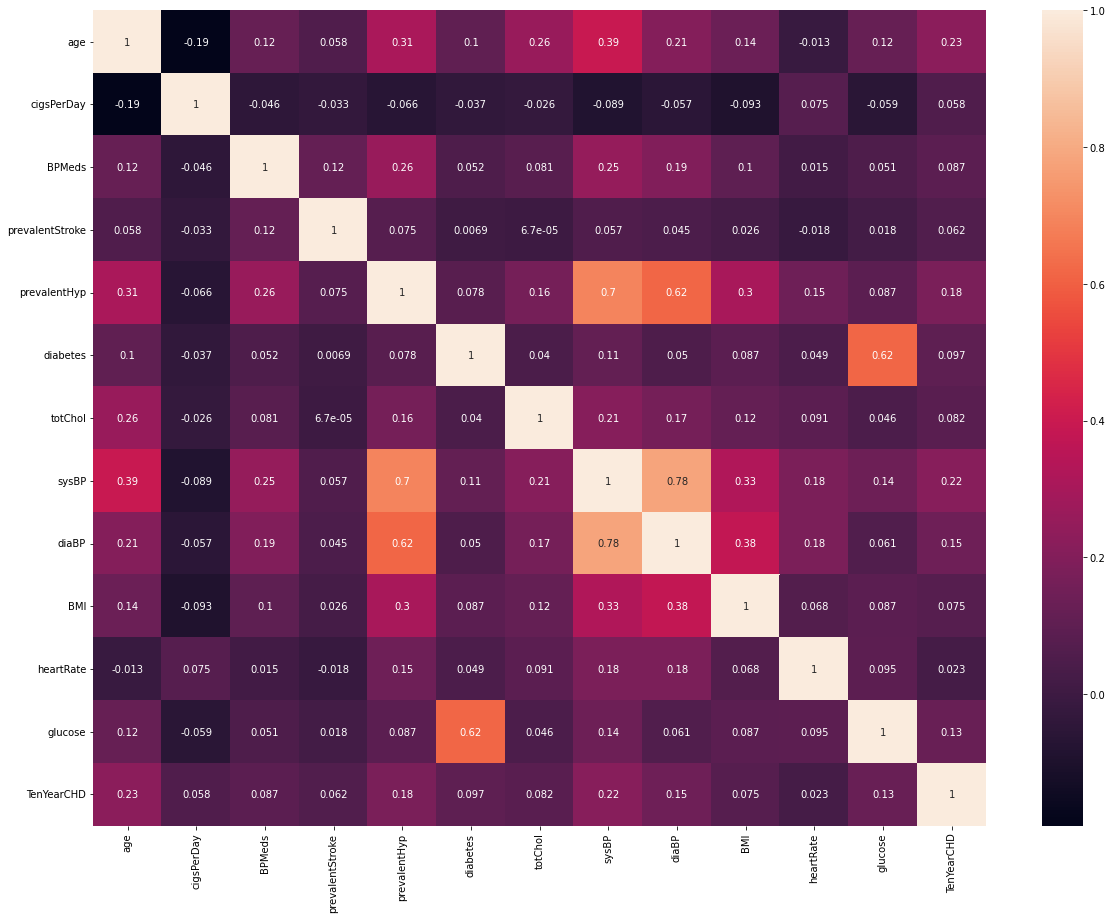

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
corrMatrix = pd.DataFrame(df, columns=['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', "TenYearCHD"]).corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

0    3594
1     644
Name: TenYearCHD, dtype: int64

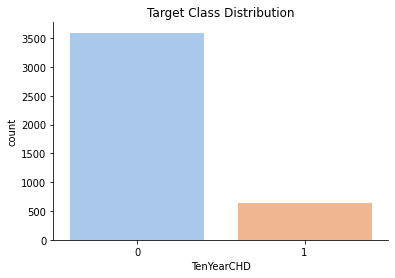

In [ ]:
sns.countplot(x="TenYearCHD", data=df, palette="pastel").set_title("Target Class Distribution")
sns.despine()
df["TenYearCHD"].value_counts()

In [ ]:
df.info()
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
<class 'panda

###Standardize and Encode Data

In [ ]:
user_backup = df3
X = df3.drop("Outcome", axis = 1)
Y = df3["Outcome"].copy()

print("X shape before processing is", X.shape)
df_numerical = X

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)
categorical_features = ["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features), 
                ("categorical", OneHotEncoder(), categorical_features)
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)
np.unique(np.isnan(X_prepared), return_counts=True)

X shape before processing is (3656, 15)
X shape after processing is (3656, 24)


(array([False]), array([87744]))

###Prepare Test Data Splits

In [ ]:
X_train_im, X_test, y_train_im, y_test = train_test_split(X_prepared, Y, test_size = 0.3, random_state = 0)

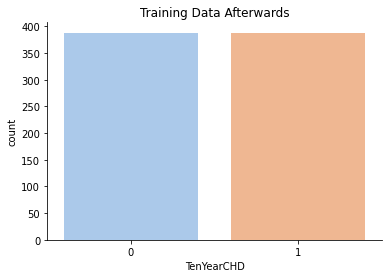

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=0)
X_train, y_train = undersampler.fit_resample(X_train_im, y_train_im)

df_target_sm = pd.DataFrame(y_train, columns=["TenYearCHD"])
sns.countplot(x="TenYearCHD", data=df_target_sm, palette="pastel").set_title("Training Data Afterwards")
sns.despine()

In [ ]:
df.isnull().sum().transpose()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


###Define Helper Functions

In [ ]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')

###Neural Network

Epoch 1/250
78/78 [==============================] - 1s 2ms/step - loss: 0.7036 - accuracy: 0.5284
Epoch 2/250
78/78 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.5876
Epoch 3/250
78/78 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6289
Epoch 4/250
78/78 [==============================] - 1s 7ms/step - loss: 0.6296 - accuracy: 0.6637
Epoch 5/250
78/78 [==============================] - 0s 5ms/step - loss: 0.6292 - accuracy: 0.6250
Epoch 6/250
78/78 [==============================] - 0s 5ms/step - loss: 0.6328 - accuracy: 0.6637
Epoch 7/250
78/78 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.6611
Epoch 8/250
78/78 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.6714
Epoch 9/250
78/78 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.6559
Epoch 10/250
78/78 [==============================] - 0s 6ms/step - loss: 0.6142 - accuracy: 0.6598
Epoch 11/

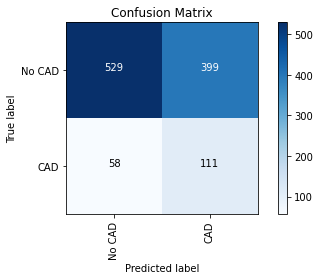

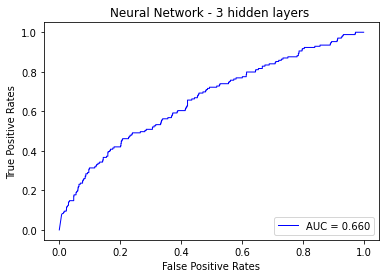

In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(64, activation='relu', input_dim=24))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu', input_dim=24))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu', input_dim=24))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=250, batch_size=10)
y_temp = model.predict(X_test)
nn_y_score = y_temp
y_pred = []
for x in y_temp:
  if x[0] < 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)
print_accuracy(y_test, y_pred)
draw_confusion_matrix(y_test, y_pred, ["No CAD", "CAD"])
draw_roc_curve(y_test, nn_y_score, "Neural Network - 3 hidden layers ", c="blue", line_width=1)

###User Input

In [ ]:
#user_input = [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose]
#https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset
age = int(input("Are you male (y/n)?")) 

user_input = []
#user_input = [[1, 16, 4.0, 0, 0.0, 0.0, 0, 0, 0, 160, 104, 74, 16.4, 80, 83]]

In [ ]:
user_df = pd.DataFrame(user_input, columns=["male", "age", "education", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])

df = user_backup.append(user_df, ignore_index=True)

X = df.drop("TenYearCHD", axis = 1)
Y = df["TenYearCHD"].copy()

print("X shape before processing is", X.shape)
df_numerical = X.drop(["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"], axis = 1)

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)
categorical_features = ["male", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features), 
                ("categorical", OneHotEncoder(), categorical_features)
                ])
user_inp = full_pipeline.fit_transform(X)

print("X shape after processing is", user_inp.shape)

X shape before processing is (3657, 15)
X shape after processing is (3657, 24)


In [ ]:
print(X_test.shape)
print(user_inp.shape)
print(user_inp)
print(type(X_test))


u_prepared = np.array([user_inp[-1]])

print(u_prepared)
print(u_prepared.shape)

y_temp = model.predict(u_prepared)
print(float(y_temp[0])*100)

(1097, 24)
(3657, 24)
[[-1.22986614 -0.7569048  -0.94897298 ...  0.          1.
   0.        ]
 [-0.41370688 -0.7569048   0.29812234 ...  0.          1.
   0.        ]
 [-0.18051852  0.92143435  0.18475004 ...  0.          1.
   0.        ]
 ...
 [ 0.16926401  2.85152438 -0.67687946 ...  0.          1.
   0.        ]
 [ 0.28585819 -0.7569048   0.72893709 ...  0.          1.
   0.        ]
 [-3.91153227 -0.7569048  -1.7425791  ...  0.          1.
   0.        ]]
<class 'numpy.ndarray'>
[[-3.91153227 -0.7569048  -1.7425791  -1.28377067 -0.74417685 -2.30633487
   0.35628501  0.04784051  0.          1.          0.          0.
   0.          1.          1.          0.          1.          0.
   1.          0.          1.          0.          1.          0.        ]]
(1, 24)
1/1 [==============================] - 0s 17ms/step
9.378842236174023e-06
